In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
World Development Indicators</p><br><br>
# Exploring Data Visualization Using Matplotlib

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/yang/Downloads/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [5]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


Looks like it has different indicators for different countries with the year and value of the indicator. 

We already saw how the USA's per-capita CO2 production related to other countries, let's see if we can find some more indicators in common between countries.  

To have some fun, we've picked countries randomly but then stored our random results so you can rerun it with the same answers.

In [6]:
# Filter 1

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [7]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [8]:
countryFilter

['Kyrgyz Republic', 'Small states']

In [9]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['PPG, multilateral concessional (NFL, current US$)']

# Problem:  We're missing data.
# Not all countries have all indicators for all years

To solve this, we'll need to find two countries and two indicators for which we have data over this time range.

In [10]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data[filterMesh]

In [11]:
len(country1_data)

5

In [12]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data[filterMesh]

In [13]:
len(country2_data)

0

# So let's pick indicators and countries which have data over this time range

The code below will randomly pick countries and indicators until it finds two countries who have data for an indicator over this time frame. We used it to produce the fixed values you see later, feel free to play with this yourself!

In [14]:
filteredData1 = []
filteredData2 = []

In [15]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years?
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


In [16]:
filteredData1.head()

,CountryName,IndicatorName,Year,Value
4940938,"Korea, Rep.","Listed domestic companies, total",2010,1781.0
5121946,"Korea, Rep.","Listed domestic companies, total",2011,1799.0
5297550,"Korea, Rep.","Listed domestic companies, total",2012,1767.0
5462396,"Korea, Rep.","Listed domestic companies, total",2013,1798.0
5591879,"Korea, Rep.","Listed domestic companies, total",2014,1849.0


In [17]:
len(filteredData1)

5

In [18]:
len(yearsFilter)-1

4

In [19]:
# What did we pick eventually ?
indicatorsFilter

['Listed domestic companies, total']

In [20]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0] #prepare for the next loop
    #print (countryFilter[1])
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [21]:
countryFilter[1]

'Liberia'

In [22]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [23]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

len(filteredData2) < len(filteredData1)-1: should be len(filteredData2) == len(filteredData1) when no data missing. It means we at most allow 1 row data missing (len(filteredData2) == len(filteredData1)-1) in each DataFrame and use[0:small] to match them.

In [24]:
filteredData1

,CountryName,IndicatorName,Year,Value
4940938,"Korea, Rep.","Listed domestic companies, total",2010,1781.0
5121946,"Korea, Rep.","Listed domestic companies, total",2011,1799.0
5297550,"Korea, Rep.","Listed domestic companies, total",2012,1767.0
5462396,"Korea, Rep.","Listed domestic companies, total",2013,1798.0
5591879,"Korea, Rep.","Listed domestic companies, total",2014,1849.0


In [25]:
filteredData2

,CountryName,IndicatorName,Year,Value
4860995,Upper middle income,"Listed domestic companies, total",2010,7459.0
5046454,Upper middle income,"Listed domestic companies, total",2011,7891.0
5222672,Upper middle income,"Listed domestic companies, total",2012,7875.0
5396043,Upper middle income,"Listed domestic companies, total",2013,6625.0
5545781,Upper middle income,"Listed domestic companies, total",2014,6294.0


<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">
Matplotlib: Additional Examples</p><br>

## Example: Scatter Plot

Now that we have the data for two countries for the same indicators, let's plot them using a scatterplot.

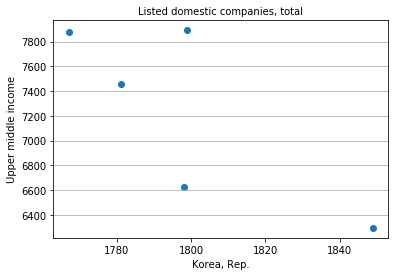

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

## Example: Line Plot

Here we'll plot the indicator over time for each country.

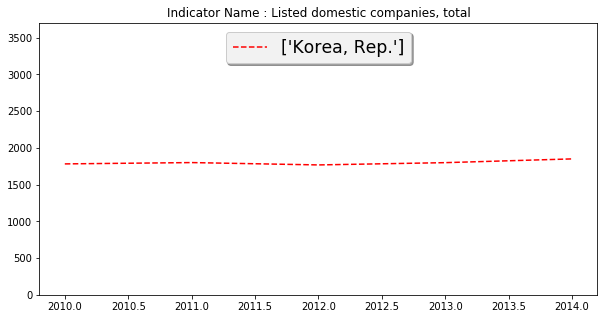

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0]) # must use + instead of ,
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend (created by the label name and line type)
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})
frame = legend.get_frame() # Rectangle around the legend
frame.set_facecolor('.95')
plt.show()

legend(labels): The elements to be added to the legend are automatically determined, you can specify labels at artist creation when plotting


## Let's plot country #2

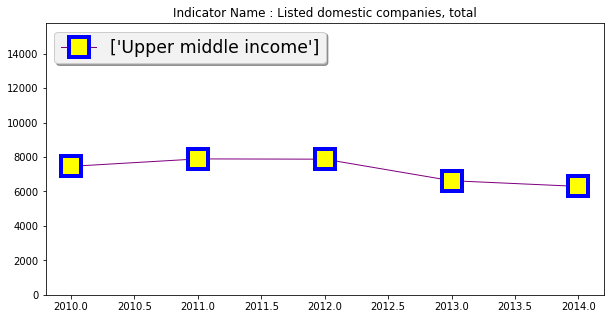

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', #line width, line style
         marker='s', markersize=20, #marker style
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

In [29]:
type (ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', #line width, line style
         marker='s', markersize=20, #marker style
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") ) #line plot

list

(line) plot( ): return a list of Line2D objects representing the plotted data

# Example: 3D (random datasets)

[0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265 3.31612558 3.4906585  3.66519143 3.83972435 4.01425728
 4.1887902  4.36332313 4.53785606 4.71238898 4.88692191 5.06145483
 5.23598776 5.41052068 5.58505361 5.75958653 5.93411946 6.10865238]


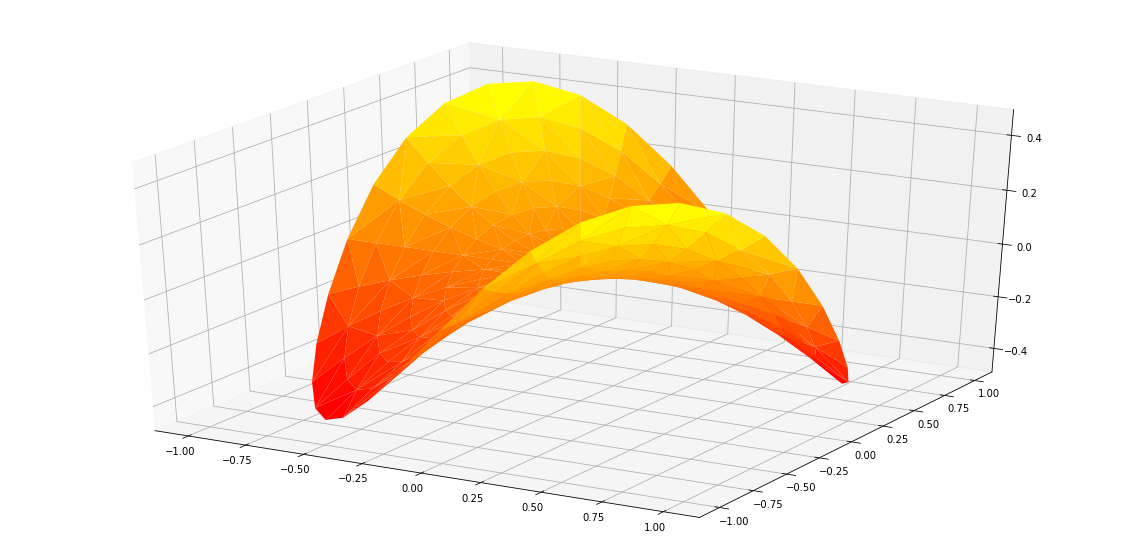

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)
print (np.linspace(0.125, 1.0, countof_radii))

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)
print (array_ang)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

In [31]:
type (ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2))

mpl_toolkits.mplot3d.art3d.Poly3DCollection

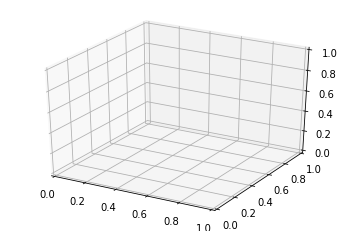

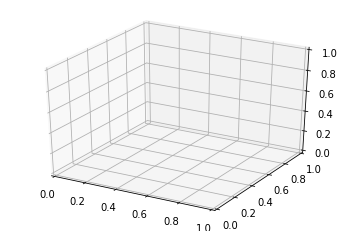

In [32]:
#To creat 3D instance, there are three ways:
plt.gca(projection='3d') # plt.gca gets the current axes, creating one if needed. 
# It is only equivalent in the simplest 1 axes case: fig.subplot(111)

plt.subplot(projection='3d')

fig = plt.figure()
fig.add_subplot(111, projection='3d') 

In [33]:
a = np.array([[1,2], [3,4]])
a.flatten()

array([1, 2, 3, 4])

# Example: Polar (random dataset)

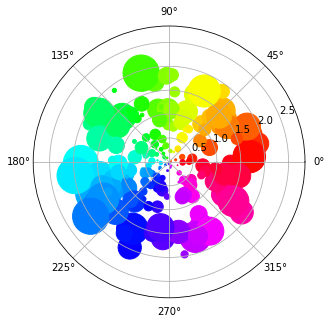

In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points) #Create an array of the given shape (200 points) from a uniform distribution over [0, 1).
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)
colors = angles

fig = plt.figure(figsize=(10,5))
ax  = plt.subplot(111, polar=True) #polar: draw on circle plot
#4-D Scatter plot
c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv) #cmap: select a color map
c.set_alpha(1.95) # alpha value: 0.0 transparent through 1.0 opaque

plt.show()
fig.savefig("vis_bubbleplot.png")

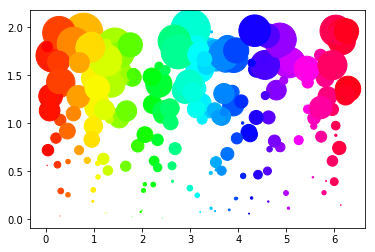

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points) #Create an array of the given shape (200 points) from a uniform distribution over [0, 1).
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)
colors = angles

#fig = plt.figure(figsize=(20,10))
fig, ax  = plt.subplots() #subplotS
#4-D Scatter plot
c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv) #cmap: select a color map: 'hsv'
# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
c.set_alpha(1.95) # alpha value: 0.0 transparent through 1.0 opaque

plt.show()
fig.savefig("vis_bubbleplot.png")

In [36]:
type (c) #scatter plot

matplotlib.collections.PathCollection

# Example 4: Box Plots (random datasets)

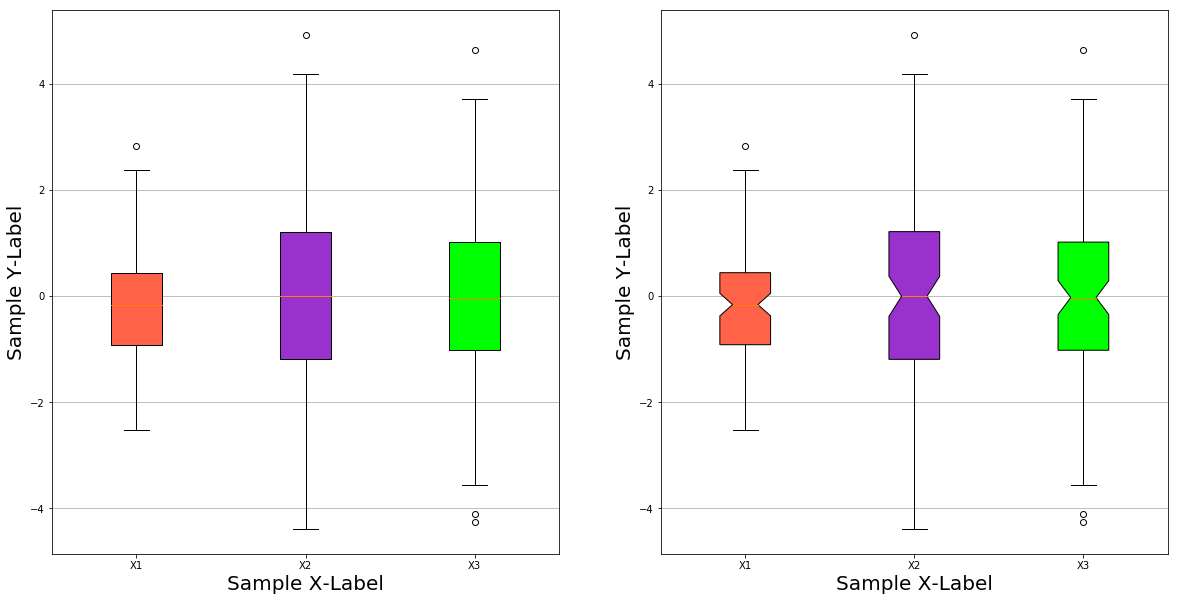

In [37]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape  # box plot: return a dict
bplot1 = axes[1].boxplot(data,
                         notch=True,          # notch!
                         vert=True,           # vertical box aligmnent
                         patch_artist=True)   # fill with color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill facecolor
colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html    

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors): # dict with built-in index 'boxes': bplot['boxes']
        patch.set_facecolor(color)
        
# alternative:
for bplot in (bplot1, bplot2): 
    for box, color in zip(bplot['boxes'], colors): #zip: 'box' and 'color' looping simutaneously
        box.set(facecolor=color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    #axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Set the Xticks (locations) and ticklabels for all axes
#example: plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'])
plt.setp(axes, xticks=[y for y in range(1,len(data)+1)],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")

In [38]:
len (data)

3

In [39]:
type (bplot1) #box plot

dict

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html